In [ ]:
# Nama  : Alfian Mohamad Firdaus

# NIM   : 1103204002

# Dokumentasi ChatGPT   : https://chat.openai.com/share/6b5aa104-5e4f-4f27-a110-28c9f4faf6d2

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


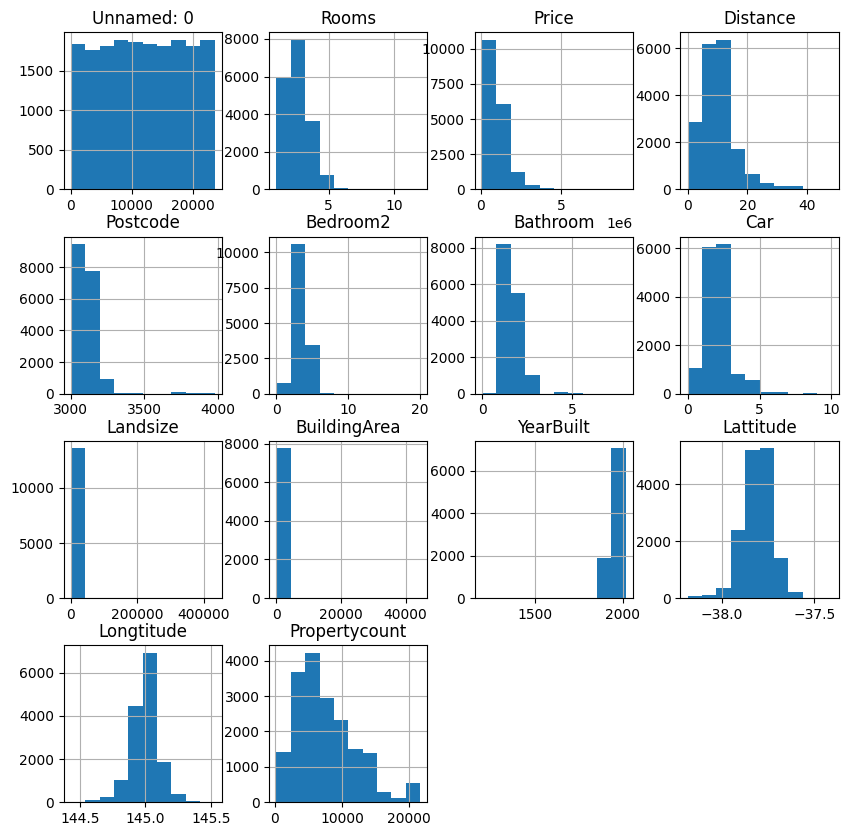

XGBoost MAE: 162474.47028812533
Random Forest MAE: 168986.52229155457
Decision Tree MAE: 246319.13824636902


In [8]:
# Mount Google Drive to access files
from google.colab import drive
drive.mount('/content/drive')

# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import OrdinalEncoder

# Load the data from Google Drive
file_path = '/content/drive/MyDrive/Dataset/melb_data.csv'
df = pd.read_csv(file_path)

# Perform feature engineering (if needed)
# For simplicity, let's assume we have already preprocessed the data

# Visualize the data
df.hist(figsize=(10, 10))
plt.show()

# Encode categorical features
categorical_cols = df.select_dtypes(include=['object']).columns
encoder = OrdinalEncoder()
df[categorical_cols] = encoder.fit_transform(df[categorical_cols])

# Remove rows with NaN values
df.dropna(inplace=True)

# Split the data into train and test sets (70% train, 30% test)
X = df.drop(columns=['Price'])  # Assuming 'Price' is the target variable
y = df['Price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train models: XGBoost, Random Forest, Decision Tree
models = {
    'XGBoost': XGBRegressor(),
    'Random Forest': RandomForestRegressor(),
    'Decision Tree': DecisionTreeRegressor()
}

# Train and evaluate each model
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    print(f'{name} MAE: {mae}')


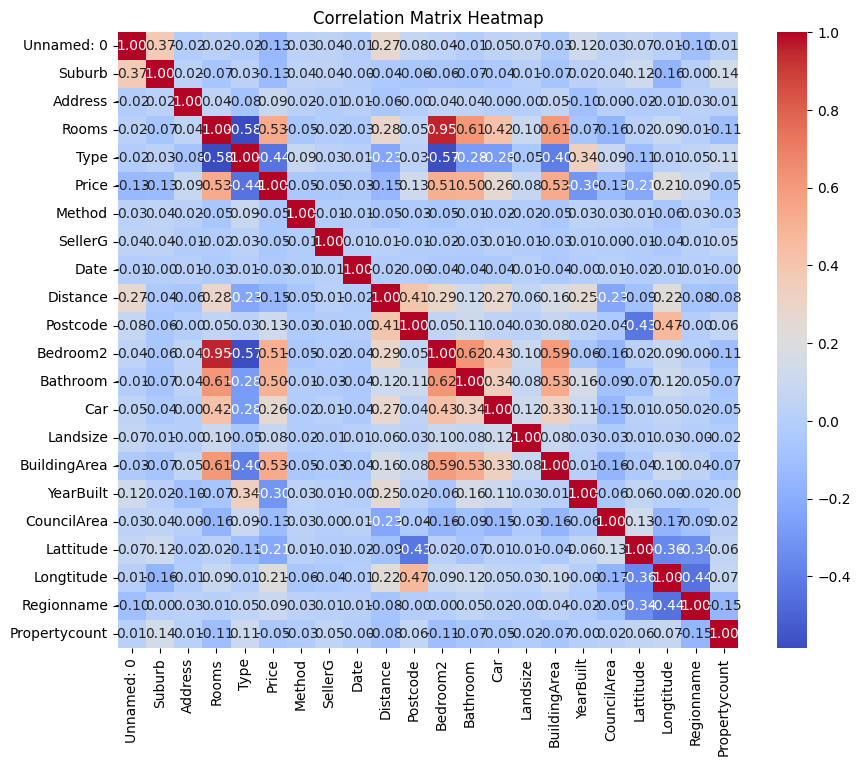

In [9]:
import seaborn as sns

# Calculate correlation matrix
corr_matrix = df.corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()
